**Decision Trees:**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

**Data Preparation:**

In [2]:
# Load your dataset
df = pd.read_csv("cleaned_merged_data.csv")


In [3]:
# Drop rows with missing target
df = df.dropna(subset=["DepDel15"]).copy()
df["DepDel15"] = df["DepDel15"].astype(int)
y = df["DepDel15"]

In [4]:
# Feature selection
features = ['Airline', 'Origin', 'Dest', 'DepTimeBlk', 'Month', 'DayOfWeek']
X = df[features].astype(str)

**Train-Test Split:**

In [5]:
# Encode categorical features
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split into train and test sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print("Train Set (X):")
print(X_train_dt.head())

print("\nTest Set (X):")
print(X_test_dt.head())

print("\nTrain Labels (y):")
print(y_train_dt.head())


Train Set (X):
        Airline  Origin  Dest  DepTimeBlk  Month  DayOfWeek
154306       15      60     0           5      3          6
272581       15      28     0          10      0          2
146735       11      36     0           2      3          0
102246       12      63     0           8     11          2
64063        11       8     0          11     10          1

Test Set (X):
        Airline  Origin  Dest  DepTimeBlk  Month  DayOfWeek
182623       12     121     0           4      9          0
8558         15     163     0           7      6          5
26629        11      90     0           9      4          0
190965       11      94     0           1      7          5
133316        7      97     0          17      1          1

Train Labels (y):
154306    0
272581    0
146735    0
102246    0
64063     0
Name: DepDel15, dtype: int64


**Implementation of Decision Trees:**

In [8]:
# Step 3: Sample small subset for visualization
X_sample = X.sample(n=200000, random_state=42)
y_sample = y.loc[X_sample.index]

# Step 4: Train 3 different trees
from sklearn.tree import DecisionTreeClassifier
#Tree 1: Default Gini, max_depth=3
tree1 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree1.fit(X_sample, y_sample)

# Tree 2: Use Entropy instead of Gini
tree2 = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=42)
tree2.fit(X_sample, y_sample)

# Tree 3: Limit features considered at each split
tree3 = DecisionTreeClassifier(max_depth=3, max_features=3, random_state=42)
tree3.fit(X_sample, y_sample)


DecisionTreeClassifier(max_depth=3, max_features=3, random_state=42)

**Displaying the trees:**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


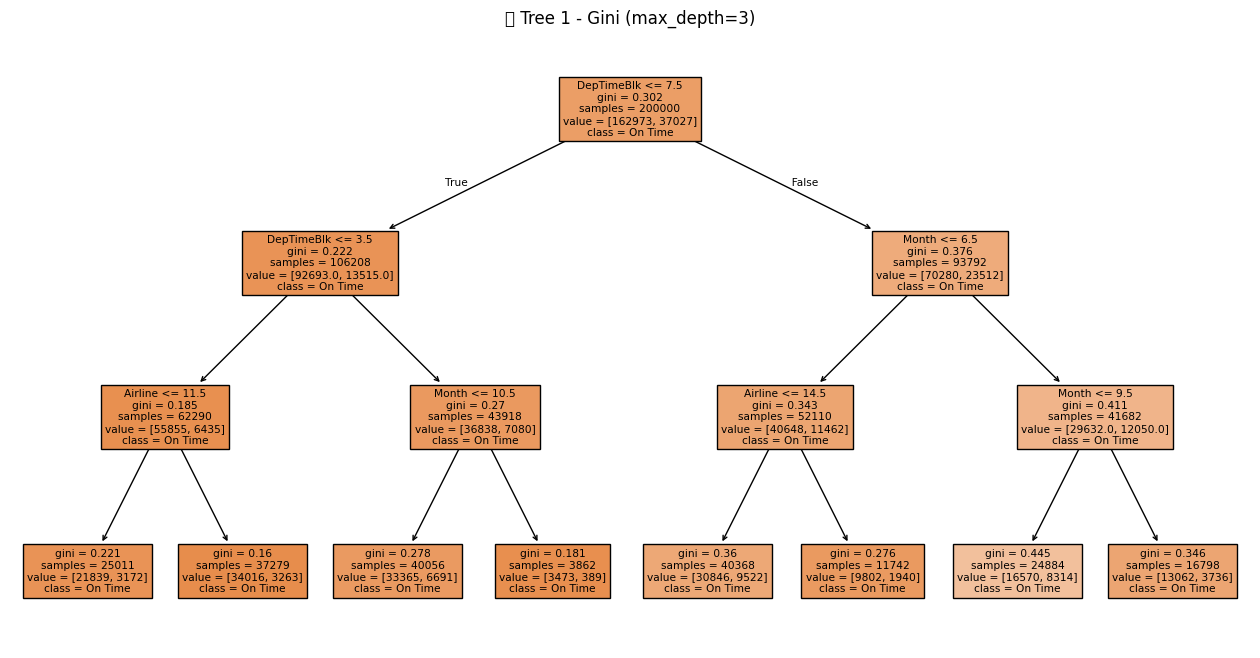

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Tree 1: Gini
plt.figure(figsize=(16, 8))
plot_tree(tree1, feature_names=X.columns, class_names=["On Time", "Delayed"], filled=True)
plt.title("🌳 Tree 1 - Gini (max_depth=3)")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


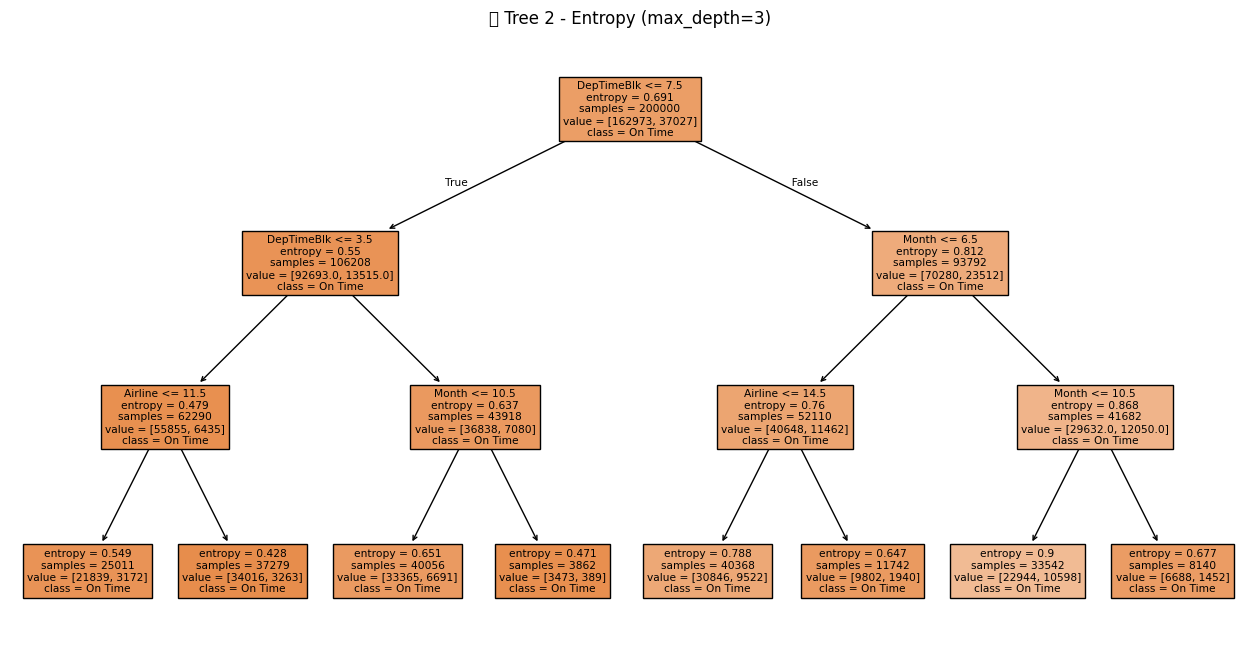

In [12]:
# Tree 2
plt.figure(figsize=(16, 8))
plot_tree(tree2, feature_names=X.columns, class_names=["On Time", "Delayed"], filled=True)
plt.title("🌲 Tree 2 - Entropy (max_depth=3)")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127796 (\N{PALM TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


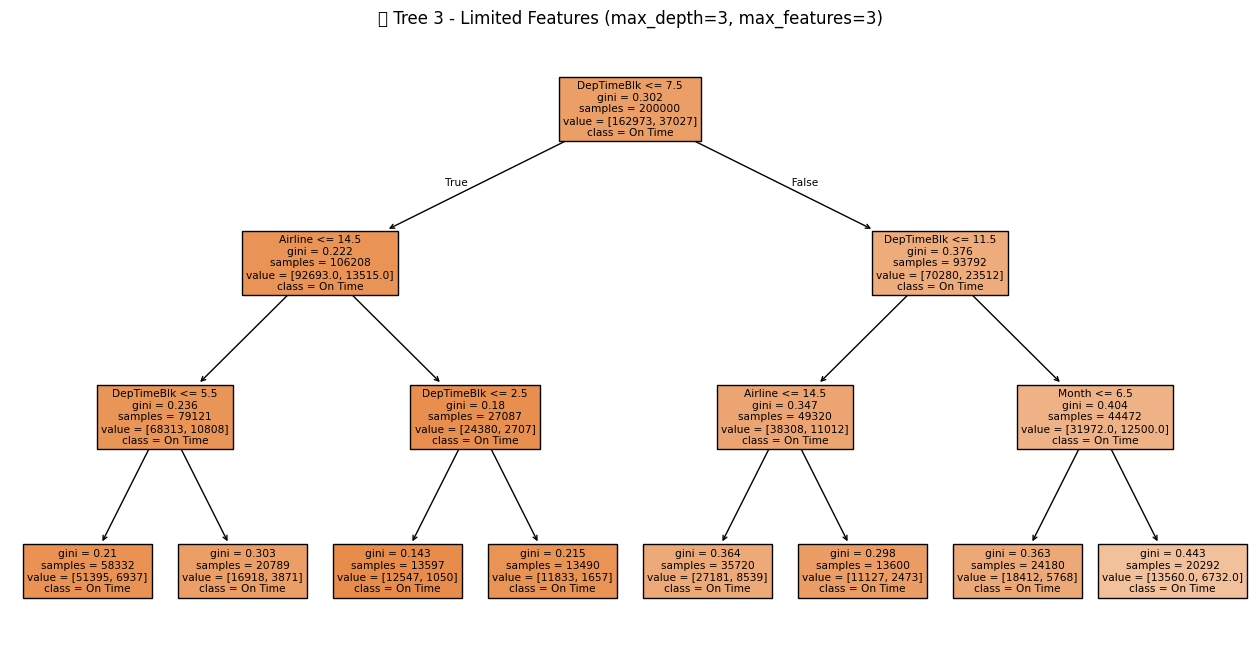

In [13]:

# Tree 3
plt.figure(figsize=(16, 8))
plot_tree(tree3, feature_names=X.columns, class_names=["On Time", "Delayed"], filled=True)
plt.title("🌴 Tree 3 - Limited Features (max_depth=3, max_features=3)")
plt.show()

**Evaluation of the Model:**

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_tree(model, X_test, y_test, title="Decision Tree"):
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{title}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return acc, prec, rec, f1


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


Tree 1 - Gini
Accuracy:  0.8149
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90    162973
           1       0.00      0.00      0.00     37027

    accuracy                           0.81    200000
   macro avg       0.41      0.50      0.45    200000
weighted avg       0.66      0.81      0.73    200000



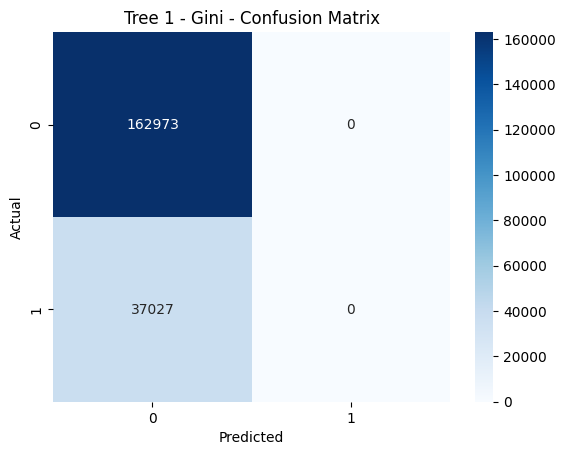

In [15]:
acc1, prec1, rec1, f1_1 = evaluate_tree(tree1, X_sample, y_sample, title="Tree 1 - Gini")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


Tree 2 - Entropy
Accuracy:  0.8149
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90    162973
           1       0.00      0.00      0.00     37027

    accuracy                           0.81    200000
   macro avg       0.41      0.50      0.45    200000
weighted avg       0.66      0.81      0.73    200000



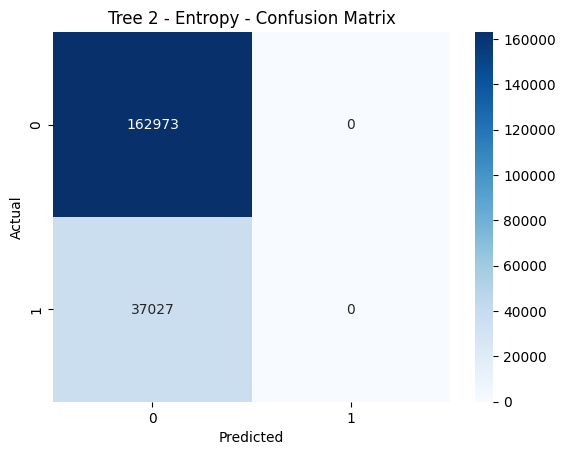

In [16]:
acc2, prec2, rec2, f1_2 = evaluate_tree(tree2, X_sample, y_sample, title="Tree 2 - Entropy")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


Tree 3 - Limited Features
Accuracy:  0.8149
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90    162973
           1       0.00      0.00      0.00     37027

    accuracy                           0.81    200000
   macro avg       0.41      0.50      0.45    200000
weighted avg       0.66      0.81      0.73    200000



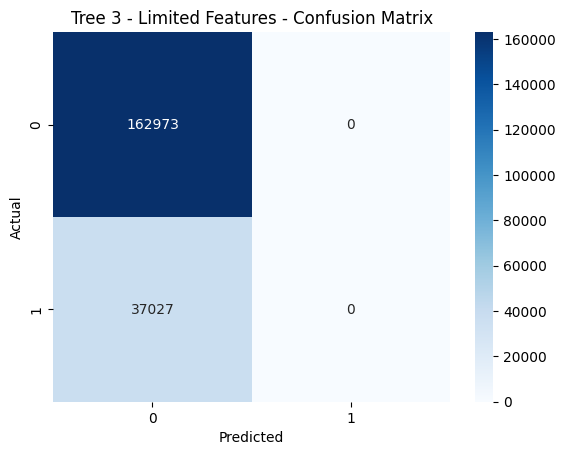

In [17]:
acc3, prec3, rec3, f1_3 = evaluate_tree(tree3, X_sample, y_sample, title="Tree 3 - Limited Features")